### Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут

https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
* satisfaction_level - Уровень удовлетворенности работой
* Last_evaluation - Время с момента последней оценки в годах
* number_projects  Количество проектов, выполненных за время работы
* average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
* time_spend_company​ - Стаж работы в компании в годах
* work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left​ - уволился ли сотрудник
* promotion_last_5years​ - повышался ли сотрудник за последние пять лет
* department ​- отдел в котором работает сотрудник
* salary​ - относительный уровень зарплаты

1. Загрузите файл HR.csv в pandas dataframe

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df_hr=pd.read_csv('hr.csv')

dict_title_hr={'satisfaction_level':'Уровень удовлетворенности работой',
'last_evaluation':'Время с момента последней оценки в годах',
'number_project': 'Количество проектов, выполненных за время работы',
'average_montly_hours':'Среднее количество часов на рабочем месте в месяц',
'time_spend_company':'Стаж работы в компании в годах',
'Work_accident':'Происходили ли несчастные случаи на рабочем месте с сотрудником',
'left':'Уволился ли сотрудник',
'promotion_last_5years':'Повышался ли сотрудник за последние пять лет',
'department':'Отдел в котором работает сотрудник',
'salary':'Относительный уровень зарплаты'}
# print(df_hr.info())
df_hr.head()
# df_hr.shape[1]
df_hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [86]:
df_stat=pd.DataFrame()

for num_col in range(df_hr.shape[1]):
    df=df_hr.iloc[:,num_col]
    if df.dtype==np.float64 or df.dtype==np.int64:
        row={'Колонка':dict_title_hr[df_hr.columns[num_col]],'Макс':df.max(), 'Мин':df.min(),'Mean':round(df.mean(),2), 'Мода':df.mode()[0],'Медиана':df.median(), 'СКО':round(df.std(),2) }
    else:
        row={'Колонка':dict_title_hr[df_hr.columns[num_col]],'Макс':np.nan, 'Мин':np.nan,'Mean':np.nan, 'Мода':df.mode()[0],'Медиана':np.nan, 'СКО':np.nan}
    row=pd.DataFrame([row])
    df_stat=pd.concat([df_stat,row])
print(df_stat.reset_index())

   index                                            Колонка   Макс    Мин  \
0      0                  Уровень удовлетворенности работой    1.0   0.09   
1      0           Время с момента последней оценки в годах    1.0   0.36   
2      0   Количество проектов, выполненных за время работы    7.0   2.00   
3      0  Среднее количество часов на рабочем месте в месяц  310.0  96.00   
4      0                     Стаж работы в компании в годах   10.0   2.00   
5      0  Происходили ли несчастные случаи на рабочем ме...    1.0   0.00   
6      0                              Уволился ли сотрудник    1.0   0.00   
7      0       Повышался ли сотрудник за последние пять лет    1.0   0.00   
8      0                 Отдел в котором работает сотрудник    NaN    NaN   
9      0                     Относительный уровень зарплаты    NaN    NaN   

     Mean   Мода  Медиана    СКО  
0    0.61    0.1     0.64   0.25  
1    0.72   0.55     0.72   0.17  
2    3.80      4     4.00   1.23  
3  201.05   

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [87]:
# sns.heatmap(df_hr.corr())
# plt.show()
min_=pd.DataFrame()

max_=pd.DataFrame()
matrix=df_hr.corr()

min_l=str(matrix['satisfaction_level'].min())

matrix2=matrix.apply(lambda x : x**2)
matrix2.index.name = 'Column2'
matrix2=matrix2.reset_index()
for col in range(0,matrix2.shape[1]):
    extr_temp=matrix2[matrix2.columns[col]].min()
    matrix_temp=matrix2.query(matrix2.columns[col]+'=='+str(extr_temp))

    for row_extr in range(matrix_temp.shape[0]):
          min_=pd.concat([min_,pd.DataFrame([{'column1':matrix2.columns[col],'column2':matrix_temp.iloc[row_extr,0],'value':extr_temp**0.5}])])
    extr_temp=matrix2[matrix2.columns[col]]
    extr_temp=extr_temp.loc[extr_temp!=1].max()
    matrix_temp=matrix2.query(matrix2.columns[col]+'=='+str(extr_temp))
    for row_extr in range(matrix_temp.shape[0]):
          max_=pd.concat([max_,pd.DataFrame([{'column1':matrix2.columns[col],'column2':matrix_temp.iloc[row_extr,0],'value':extr_temp**0.5}])])
min_=min_.sort_values('value').head(1)
max_=max_.sort_values('value',ascending=False).head(1)

print(' Наименее скоррелированные переменные "',dict_title_hr[min_['column1'][0]],'" и "', dict_title_hr[min_['column2'][0]],'"',round(min_['value'][0],3),'\n',
      'Наиболее скоррелированные переменные',dict_title_hr[max_['column1'][0]],'" и "',dict_title_hr[min_['column2'][0]],'"',round(max_['value'][0],3))


 Наименее скоррелированные переменные " Стаж работы в компании в годах " и " Происходили ли несчастные случаи на рабочем месте с сотрудником " 0.002 
 Наиболее скоррелированные переменные Количество проектов, выполненных за время работы " и " Происходили ли несчастные случаи на рабочем месте с сотрудником " 0.417


4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [88]:
df_hr.groupby('department')['left'].count().reset_index().sort_values(by='left',ascending=False).\
rename({'department':"Департамент",'left':"Количество сотрудников"},axis='columns')

,Департамент,Количество сотрудников
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


5. Показать распределение сотрудников по зарплатам.

In [89]:
df_hr.groupby('salary')['left'].count().reset_index().sort_values(by='left',ascending=False).\
rename({'salary':"Зарплата",'left':"Количество сотрудников"},axis='columns')

,Зарплата,Количество сотрудников
1,low,7316
2,medium,6446
0,high,1237


6. Показать распределение сотрудников по зарплатам в каждом  департаменте по отдельности.

In [90]:
df_hr.groupby(['department','salary'])['left'].count()\
.reset_index()\
.sort_values(by='left',ascending=False)\
.rename({'department':"Департамент",'salary':"Зарплата",'left':"Количество сотрудников"},axis='columns')

,Департамент,Зарплата,Количество сотрудников
22,sales,low,2099
23,sales,medium,1772
28,technical,low,1372
29,technical,medium,1147
25,support,low,1146
26,support,medium,942
1,IT,low,609
2,IT,medium,535
19,product_mng,low,451
16,marketing,low,402


7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Анализ. 


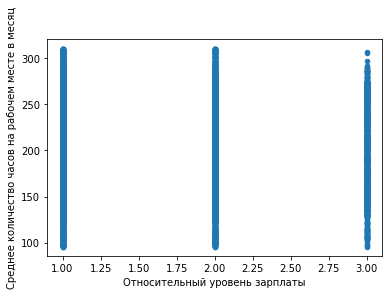

    Коэффициент корреляции Спирмена  0.002 . Связь между зарплатой и времени отсутствует.


In [91]:
from scipy import stats
def salary_to_rang(row):
    if row.salary=='low':
        salary_rang=1
    elif row.salary=='medium':
        salary_rang=2
    else:
        salary_rang=3
    return salary_rang
#dict_title_hr={'satisfaction_level':'Уровень удовлетворенности работой',
# 'last_evaluation':'Время с момента последней оценки в годах',
# 'number_project': 'Количество проектов, выполненных за время работы',
# 'average_montly_hours':'Среднее количество часов на рабочем месте в месяц',
# 'time_spend_company':'Стаж работы в компании в годах',
# 'Work_accident':'Происходили ли несчастные случаи на рабочем месте с сотрудником',
# 'left':'Уволился ли сотрудник',
# 'promotion_last_5years':'Повышался ли сотрудник за последние пять лет',
# 'department':'Отдел в котором работает сотрудник',
# 'salary':'Относительный уровень зарплаты'}

df_hr['salary_rang'] = df_hr.apply(salary_to_rang, axis=1)
# print(df_hr)
print('Анализ. ')
ax= df_hr.plot(kind='scatter', y='average_montly_hours', x='salary_rang')
ax.set_xlabel('Относительный уровень зарплаты')
ax.set_ylabel('Среднее количество часов на рабочем месте в месяц')
plt.show()
coef_spearman=round(df_hr[['salary_rang', 'average_montly_hours']].corr(method='spearman').iloc[0,1],3)
print(f'    Коэффициент корреляции Спирмена ',coef_spearman,'. Связь между зарплатой и времени отсутствует.')


8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
   * Доля сотрудников с повышением за последние 5 лет
   * Средняя степень удовлетворенности
   * Среднее количество проектов

In [92]:
def task8(df,title):
    print('Доля сотрудников с повышением за последние 5 лет среди',title,' = ', round(df.query('promotion_last_5years==1').left.count()/df.left.count(),2))
    print('Cредняя степень удовлетворенности среди',title,' = ', round(df.satisfaction_level.mean(),2))
    print('Среднее количество проектов',title,' = ', round(df.number_project.mean(),2))
df_hr_left=df_hr.query('left==1')
df_hr_work=df_hr.query('left==0')
task8(df_hr.query('left==1'),'уволившихся')
task8(df_hr.query('left==0'),'работающих')


Доля сотрудников с повышением за последние 5 лет среди уволившихся  =  0.01
Cредняя степень удовлетворенности среди уволившихся  =  0.44
Среднее количество проектов уволившихся  =  3.86
Доля сотрудников с повышением за последние 5 лет среди работающих  =  0.03
Cредняя степень удовлетворенности среди работающих  =  0.67
Среднее количество проектов работающих  =  3.79


9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary).
Оценить качество модели на тестовой выборки.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df_hr[['satisfaction_level','last_evaluation','number_project',
'average_montly_hours',
'time_spend_company',
'Work_accident',
'promotion_last_5years']]
y = df_hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print('Коэффициент детерминации = ',round(model.score(X_test, y_test),2),'Коэффициент детерминации низкий, модель низкого качества.')


Коэффициент детерминации =  0.18 Коэффициент детерминации низкий, модель низкого качества.


10. Загрузить jupyter notebook с решение на github и прислать ссылку.